In [7]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [8]:
#!pip list

In [9]:
## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [10]:
import tensorflow as tf
import os

In [11]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [12]:
tf.config.list_physical_devices('GPU')

[]

## Remove Dodgy images

In [13]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: opencv-python in c:\users\smrc\anaconda3\lib\site-packages (4.8.1.78)



In [14]:
import cv2
import imghdr

In [27]:
data_dir = 'OneDrive/Desktop/myenv/Image Classification' 

In [28]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [29]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

## Load Data

In [30]:
import numpy as np
from matplotlib import pyplot as plt

In [39]:
 #tf.keras.utils.image_dataset_from_directory??

In [31]:
data = tf.keras.utils.image_dataset_from_directory('OneDrive/Desktop/myenv/Image Classification')

Found 171 files belonging to 2 classes.


In [32]:
data_iterator = data.as_numpy_iterator()

In [33]:
batch = data_iterator.next()

In [37]:
batch[0].shape

(32, 256, 256, 3)

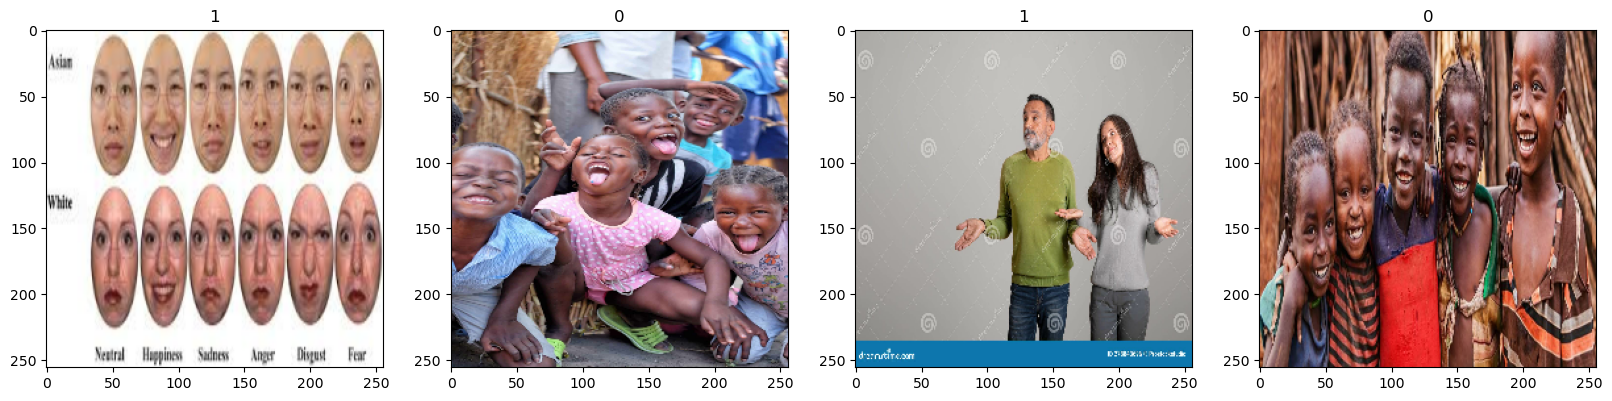

In [34]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [40]:
#Class 1= sad people
#Class 0= happy people

## Scale Data

In [41]:
data = data.map(lambda x,y: (x/255, y))

In [42]:
data.as_numpy_iterator().next()

(array([[[[0.78115284, 0.80468225, 0.7968391 ],
          [0.7607843 , 0.78431374, 0.7764706 ],
          [0.7498468 , 0.7733762 , 0.7655331 ],
          ...,
          [0.75248164, 0.7799326 , 0.75248164],
          [0.7921569 , 0.81960785, 0.7921569 ],
          [0.7766386 , 0.8040896 , 0.7766386 ]],
 
         [[0.77752805, 0.80105746, 0.7932143 ],
          [0.75686276, 0.78039217, 0.77254903],
          [0.75604844, 0.77957785, 0.7717347 ],
          ...,
          [0.7490196 , 0.7764706 , 0.7490196 ],
          [0.7921569 , 0.81960785, 0.7921569 ],
          [0.7921569 , 0.81960785, 0.7921569 ]],
 
         [[0.78431374, 0.80784315, 0.8       ],
          [0.7368695 , 0.760399  , 0.7525558 ],
          [0.7277789 , 0.7513083 , 0.7434652 ],
          ...,
          [0.7490196 , 0.7764706 , 0.7490196 ],
          [0.7921569 , 0.81960785, 0.7921569 ],
          [0.7921569 , 0.81960785, 0.7921569 ]],
 
         ...,
 
         [[0.14726035, 0.12373095, 0.13157408],
          [0.16317

## Split Dataset

In [46]:
len(data)

6

In [53]:
train_size = int(len(data)*.7)-1
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [54]:
train_size

3

In [55]:
val_size

2

In [56]:
test_size

1

In [57]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Build deep Learning Model

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [59]:
model = Sequential()

In [60]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [61]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Train

In [63]:
logdir='logs'

In [64]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [65]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 14s 3s/step - loss: 0.8354 - accuracy: 0.5938 - val_loss: 0.7054 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 9s 3s/step - loss: 0.6933 - accuracy: 0.5104 - val_loss: 0.6202 - val_accuracy: 0.6250
Epoch 3/20
3/3 [==============================] - 9s 3s/step - loss: 0.6001 - accuracy: 0.5729 - val_loss: 0.5841 - val_accuracy: 0.6094
Epoch 4/20
3/3 [==============================] - 9s 3s/step - loss: 0.6262 - accuracy: 0.6458 - val_loss: 0.5285 - val_accuracy: 0.7344
Epoch 5/20
3/3 [==============================] - 9s 3s/step - loss: 0.5272 - accuracy: 0.7083 - val_loss: 0.4879 - val_accuracy: 0.9062
Epoch 6/20
3/3 [==============================] - 10s 3s/step - loss: 0.4902 - accuracy: 0.7708 - val_loss: 0.4461 - val_accuracy: 0.7656
Epoch 7/20
3/3 [==============================] - 9s 3s/step - loss: 0.4005 - accuracy: 0.8542 - val_loss: 0.3794 - val_accuracy: 0.7969
Epoch 8/20
3/3 [=======================

## Plot Performance

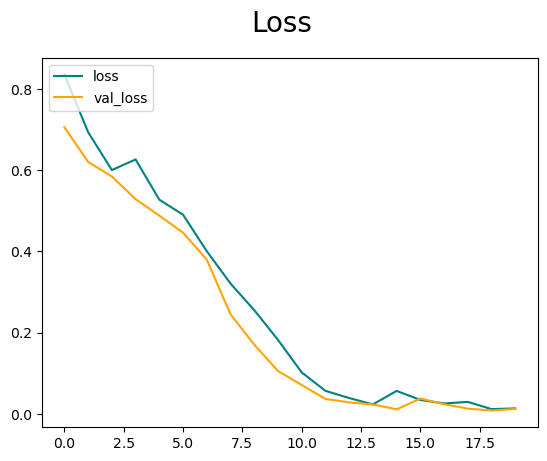

In [66]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

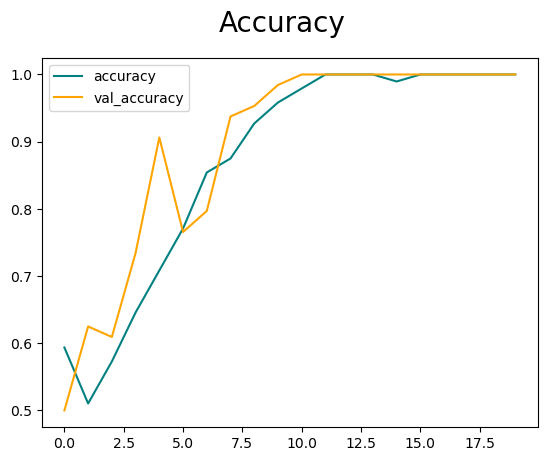

In [67]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate

In [68]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [69]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [71]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 730ms/step


In [77]:
print(f'precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

precision:1.0,Recall:1.0,Accuracy:1.0


In [72]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


## Test

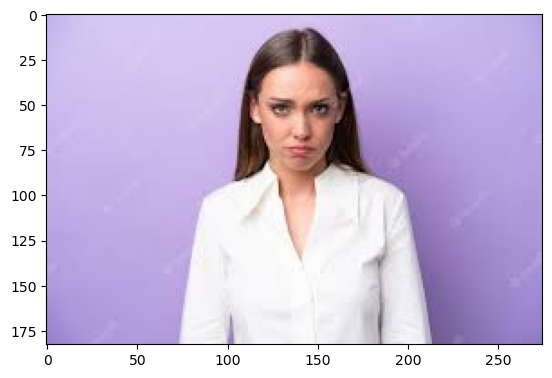

In [84]:
img = cv2.imread('OneDrive/Desktop/myenv/sad test.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

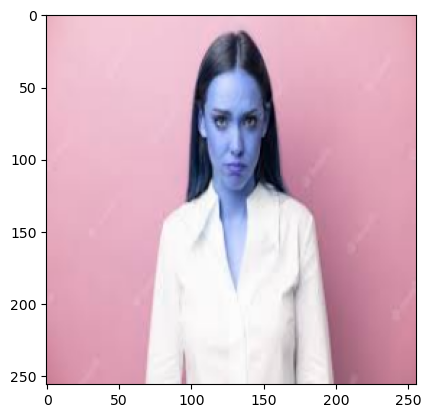

In [85]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [86]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 226ms/step


In [87]:
yhat 

array([[0.99959195]], dtype=float32)

In [88]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


## Save the Model

In [89]:
from tensorflow.keras.models import load_model

In [90]:
model.save(os.path.join('OneDrive/Desktop/myenv/Image Classification','Image Class.h5'))

In [92]:
new_model = load_model('OneDrive/Desktop/myenv/Image Classification/Image Class.h5')

In [94]:
yhatnew=new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 6s 6s/step


In [95]:
if yhatnew > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
